In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tqdm.notebook import tqdm

from pan20 import fake, util

In [4]:
nlp = spacy.load('en_core_web_sm')

In [2]:
df = fake.load()

In [5]:
media = [
    'ABC',
    'BBC',
    'Bloomberg',
    'CBS',
    'CNBC',
    'CNN',
    'Fox News',
    'Fox',
    'NBC News',
    'NBC',
    'RCN America',
    'RCN America - Maine',
    'Reuters',
    'The New York Times',
    'The Washington Post',
    'Washington Post',
]

In [6]:
truth = {}
for _, x in df.iterrows():
    truth[x.author] = x.label

In [9]:
author_dict = util.IxDict(df.author.unique())
media_dict = util.IxDict(media)

In [19]:
data = []
with tqdm(total=len(author_dict)) as pbar:
    for author in df.author.unique():
        tweets = df[df.author == author]
        tweets = ' '.join([x.tweet for _, x in tweets.iterrows()])
        x = {
            'author': author, 
            'label': truth[author],
            'org_count': sum(1 for m in media if m in tweets),
        } 
        data.append(x)
        pbar.update()
data = pd.DataFrame(data)

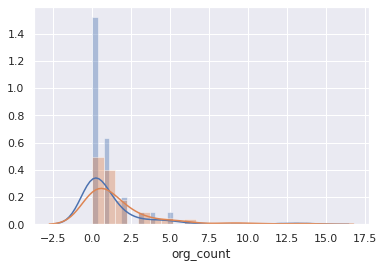

In [20]:
sns.distplot(data[data.label == False].org_count, label='Not Spreader')
sns.distplot(data[data.label == True].org_count, label='Spreader')
plt.show()